In [ ]:
install.packages('quantmod')
library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
options("getSymbols.warning4.0"=FALSE)

getSymbols("VTI")
# str(VTI) # We start with an xts
z = as.data.frame(VTI$VTI.Adjusted) #Subsetting VTI.Adjusted
print(head(z))
D2D = function (x) {
    days = nrow(x)
    delta = numeric(days)
    for(i in 2:days){
        delta[i] <- (100*((x[i, 1] - x[i - 1, 1]) / (x[i - 1, 1])))
    }
    delta
}
VTI.InterDay = D2D(z)
VTI.InterDay[1] <- mean(VTI.InterDay)#Something to fill in the 0 in row 1.
vti = merge(VTI,VTI.InterDay)

mov <- vti$VTI.InterDay

[1] "VTI"

           VTI.Adjusted
2007-01-03     52.34150
2007-01-04     52.44621
2007-01-05     52.03108
2007-01-08     52.22181
2007-01-09     52.22181
2007-01-10     52.33775


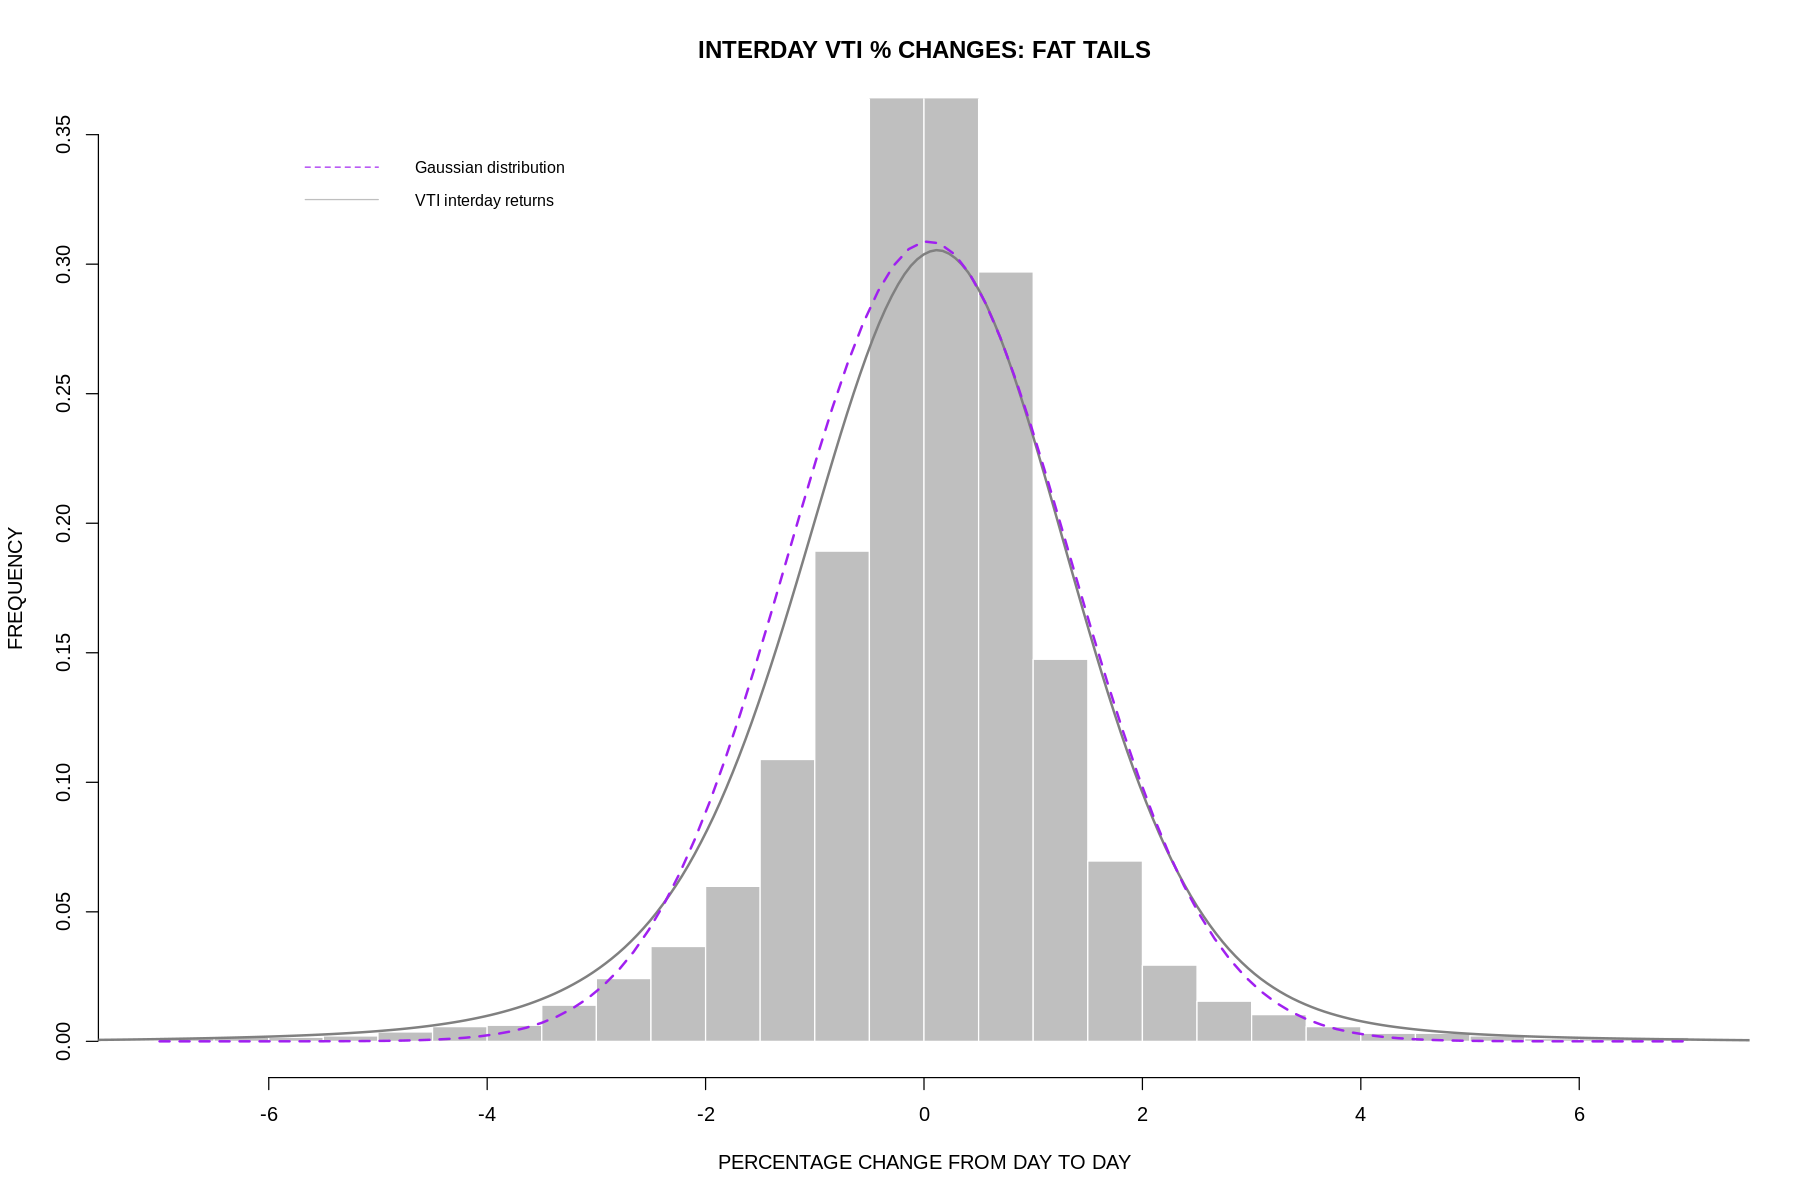

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

ylim <- 0.35
hist(mov,main="INTERDAY VTI % CHANGES: FAT TAILS", border=F,
     xlab = "PERCENTAGE CHANGE FROM DAY TO DAY",
     ylab = "FREQUENCY",prob = TRUE, xlim=c(-7,7), ylim=c(0,ylim),
     breaks=50, col=rgb(.5,.5,.5,0.5))

#Add density estimate
lines(density(mov,adjust=7),col=rgb(.5,.5,.5,1),lwd=2) #Prettier, adjusted pdf estimate
sd = sd(mov)
m = mean(mov)
curve(dnorm(x,mean=m,sd=sd),col="purple",lwd=2,lty=2,add=T,yaxt="n")
legend(-6, ylim, legend=c("Gaussian distribution", "VTI interday returns"), bty='n',
       col=c("purple", col=rgb(.5,.5,.5,0.5)), lty=c(2,1), cex=0.8)

In [ ]:
# Worst and best days in the market
print(time(mov[mov==min(mov)]))
print(time(mov[mov==max(mov)]))

[1] "2020-03-16"
[1] "2008-10-13"


![](https://user-images.githubusercontent.com/9312897/153725686-6545eddf-548b-4ca0-8942-324618afbd03.png)

In [ ]:
# Worst days in the market
mov[head(order(mov))]

           VTI.InterDay
2008-10-15    -9.352944
2008-12-01    -8.939059
2011-08-08    -6.929551
2020-03-09    -8.028447
2020-03-12    -9.723918
2020-03-16   -11.380850

In [ ]:
# Best days in the market
mov[mov==min(mov)]
mov[head(order(mov, decreasing=T))]

           VTI.InterDay
2020-03-16    -11.38085

           VTI.InterDay
2008-10-13    12.829768
2008-10-28    10.038234
2009-03-23     6.945915
2020-03-13     9.101847
2020-03-24     9.489758
2020-04-06     6.994639

In [ ]:
star <- row(mov)[mov==max(mov)]
mov[(star-3):(star+3),]

           VTI.InterDay
2008-10-08   -1.9122304
2008-10-09   -6.2794966
2008-10-10   -2.8902791
2008-10-13   12.8297675
2008-10-14   -0.8593264
2008-10-15   -9.3529436
2008-10-16    4.6030503

In [ ]:
print(format(as.Date("2008-10-10"), '%A'))
format(as.Date(time(mov[mov==max(mov)])), '%A')

[1] "Friday"


[1] "Monday"

![](https://user-images.githubusercontent.com/9312897/153689428-b5e7ebf6-a2cf-4367-8ca9-973c46e6a680.png)
![](https://user-images.githubusercontent.com/9312897/153725477-c06f8598-e5ab-4f0a-b469-b90b2109e788.png)

In [ ]:
# Number of days this year with a loss of more than n percentage:
n <- 2
sum(mov["2022"] < - n)

[1] 10

In [ ]:
# Number of days in the period specified with a loss of more than n percentage:
n <- 4
sum(mov["2020/2022"] < - n)

[1] 9

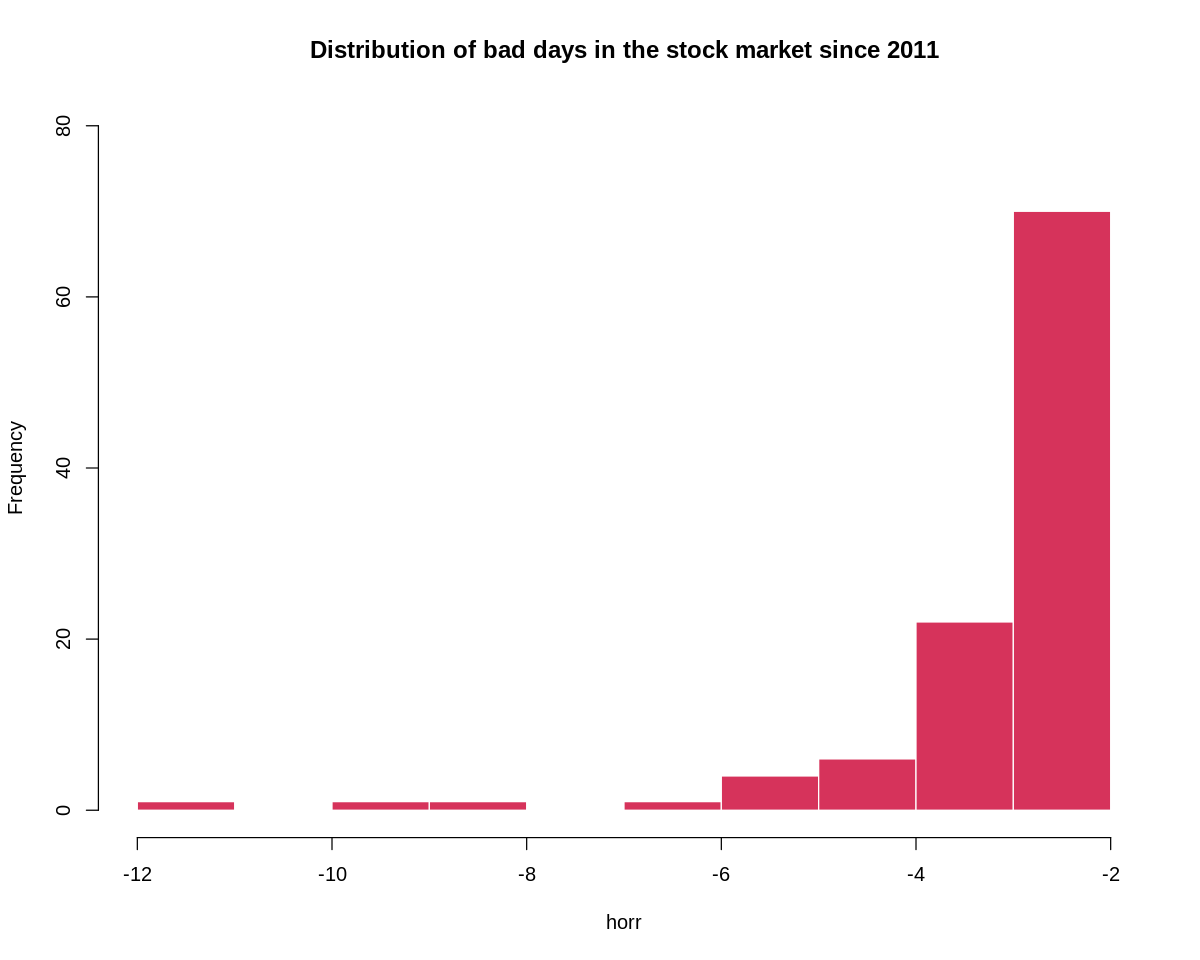

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
horr <- mov["2011/2022"][mov["2011/2022"] < - 2]
hist(horr, col=rgb(.8,0,.2,.8), border=F, main="Distribution of bad days in the stock market since 2011", ylim=c(0,80))

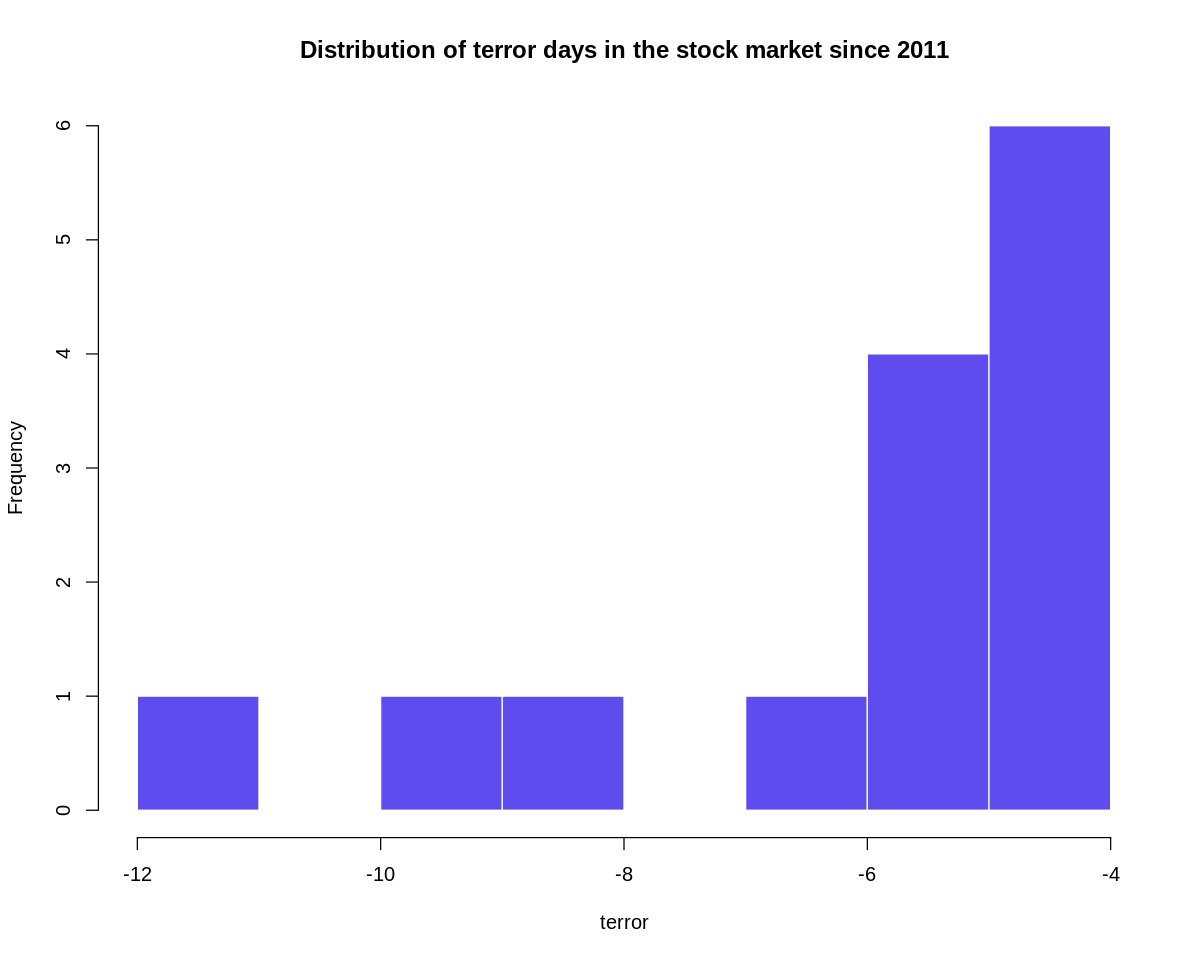

In [ ]:
terror <- mov["2011/2022"][mov["2011/2022"] < - 4]
hist(terror, col=rgb(.1,0,.9,.7),
     main="Distribution of terror days in the stock market since 2011",
     border=F, breaks=8)

In [ ]:
# Which was the worst day in the market since 2011?
horr[horr < -11]

           VTI.InterDay
2020-03-16    -11.38085

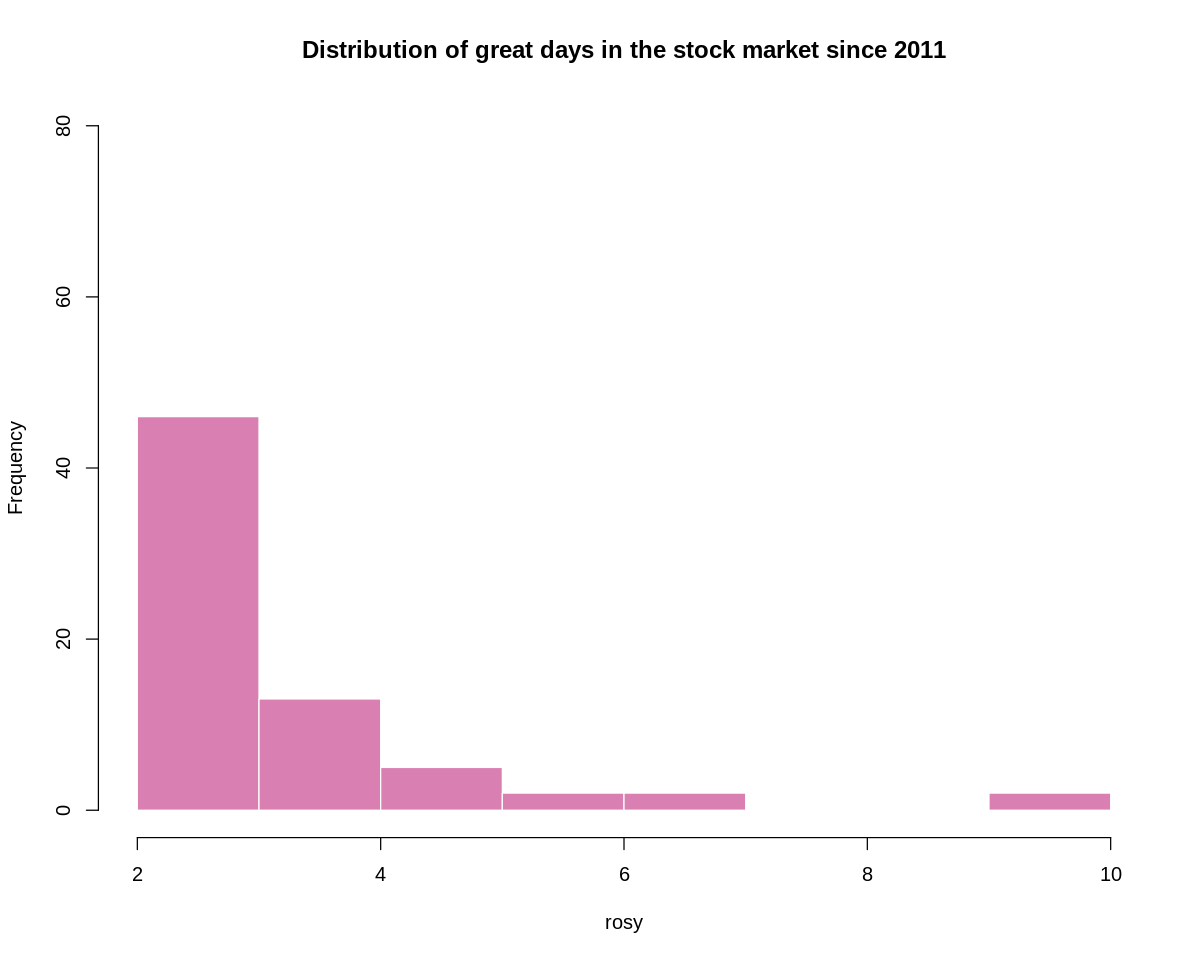

In [ ]:
rosy <- mov["2011/2022"][mov["2011/2022"] > 2]
hist(rosy, col=rgb(.7,0,.4,.5), border=F, main="Distribution of great days in the stock market since 2011", ylim=c(0,80))

           VTI.InterDay
2011-08-09     5.004359
2011-08-11     4.578551
2011-11-30     4.231774
2018-12-26     4.812011
2020-03-02     4.141173
2020-03-10     4.960287
2020-03-13     9.101847
2020-03-17     5.014106
2020-03-24     9.489758
2020-03-26     6.070905
2020-04-06     6.994639


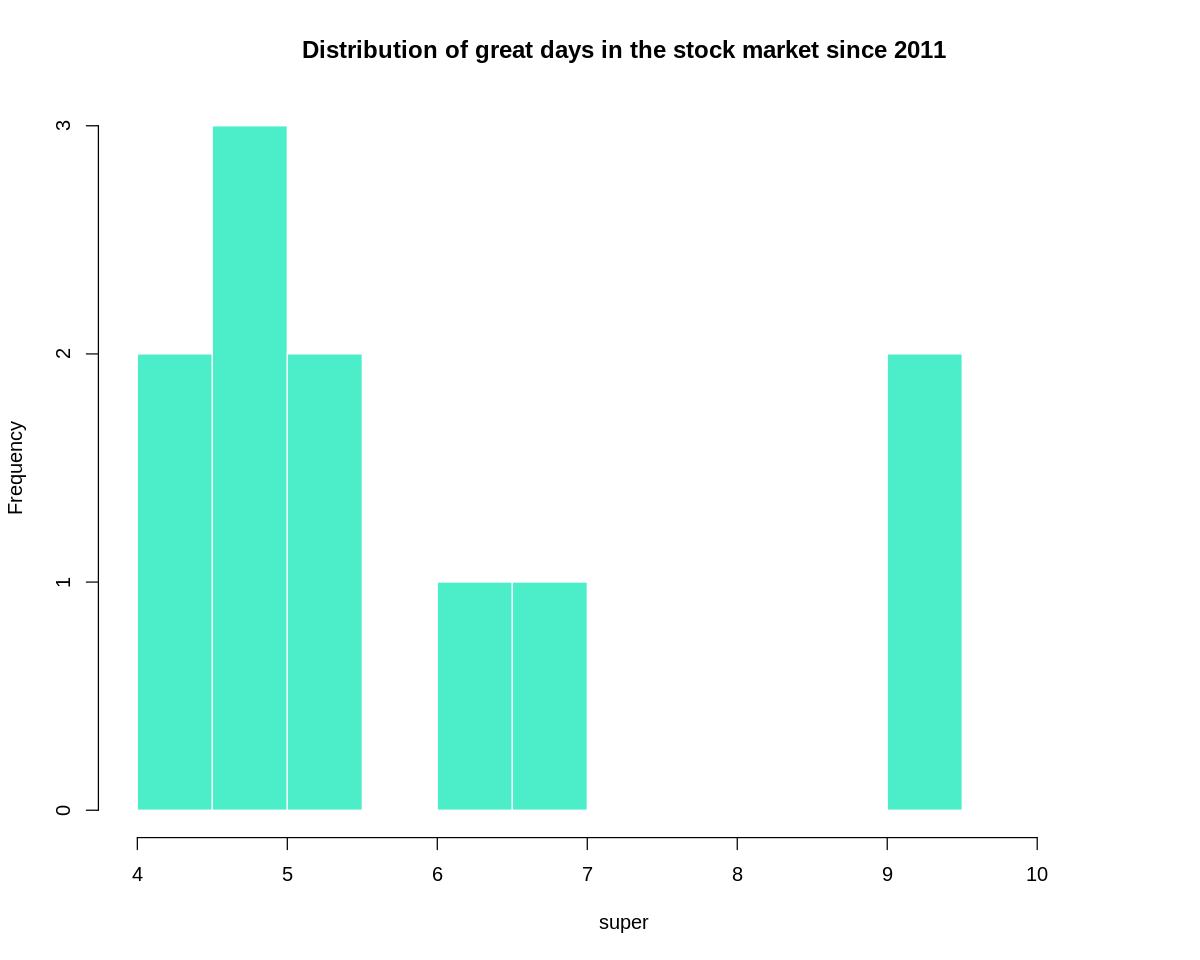

In [ ]:
options(warn=-1)
n <- 4
super <- mov["2011/2022"][mov["2011/2022"] > n]
hist(super, col=rgb(.0,.9,.7,.7), border=F, main="Distribution of great days in the stock market since 2011",
     xlim=c(n,max(super)+1), breaks=8, frequency=F)
print(super)

In [ ]:
summary(mov)

     Index             VTI.InterDay      
 Min.   :2007-01-03   Min.   :-11.38085  
 1st Qu.:2010-11-06   1st Qu.: -0.41842  
 Median :2014-09-16   Median :  0.08155  
 Mean   :2014-09-15   Mean   :  0.04395  
 3rd Qu.:2018-07-23   3rd Qu.:  0.61079  
 Max.   :2022-05-27   Max.   : 12.82977  

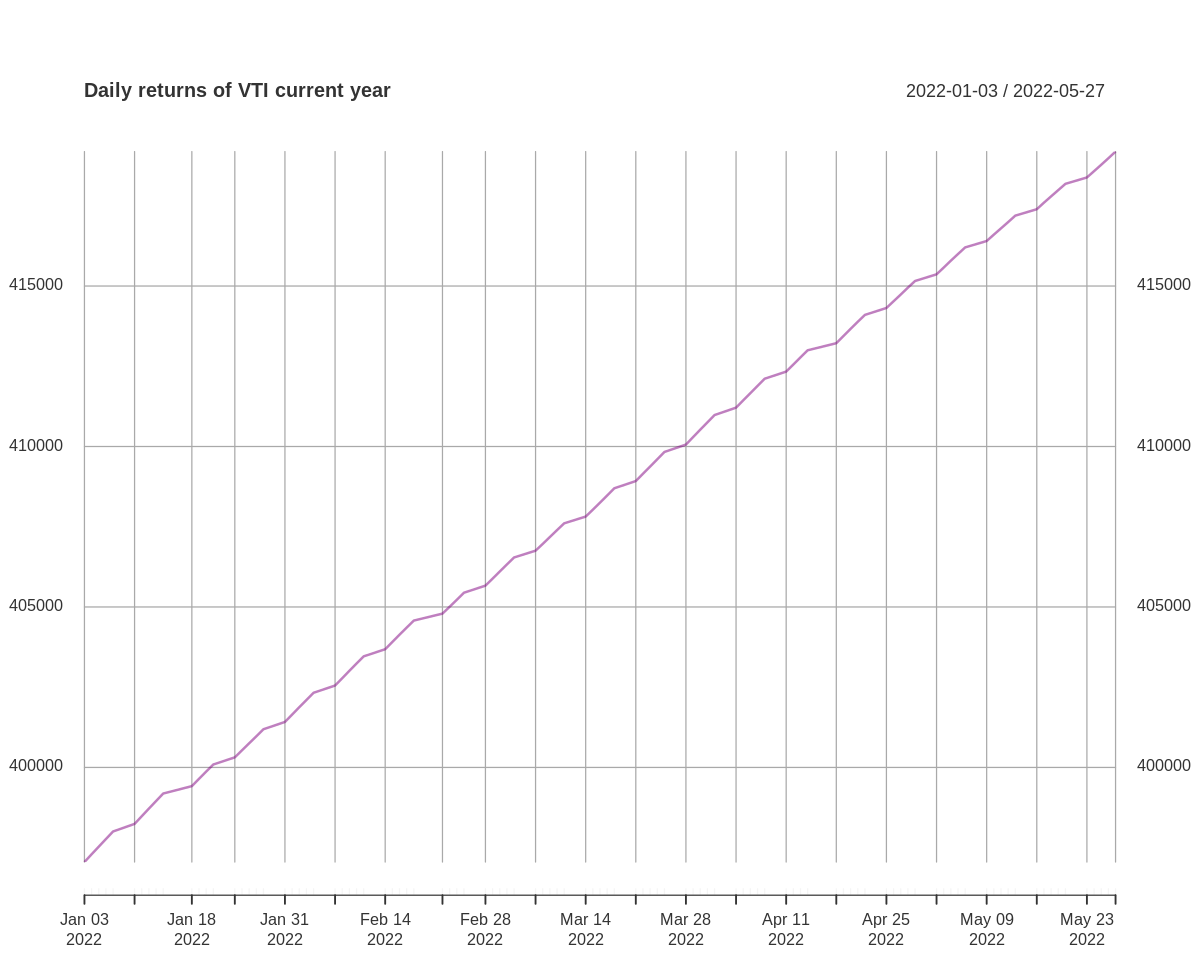

In [ ]:
c <- cumsum(VTI$VTI.Close)
plot(c["2022"], main='Daily returns of VTI current year', lwd=2, col=rgb(0.5,0,0.5,0.5))

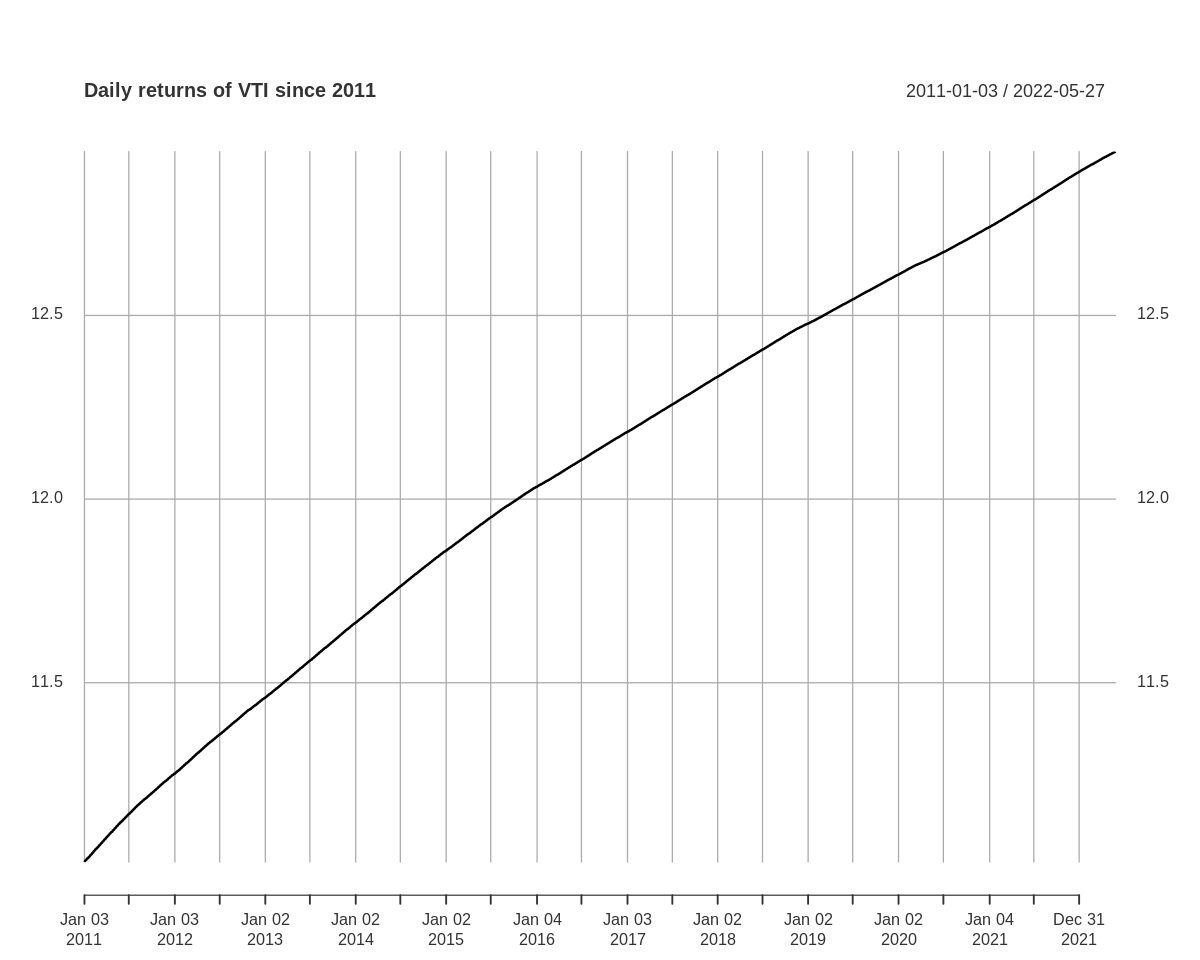

In [ ]:
l <- c(log(c))
plot(l["2011/2022"], main='Daily returns of VTI since 2011')

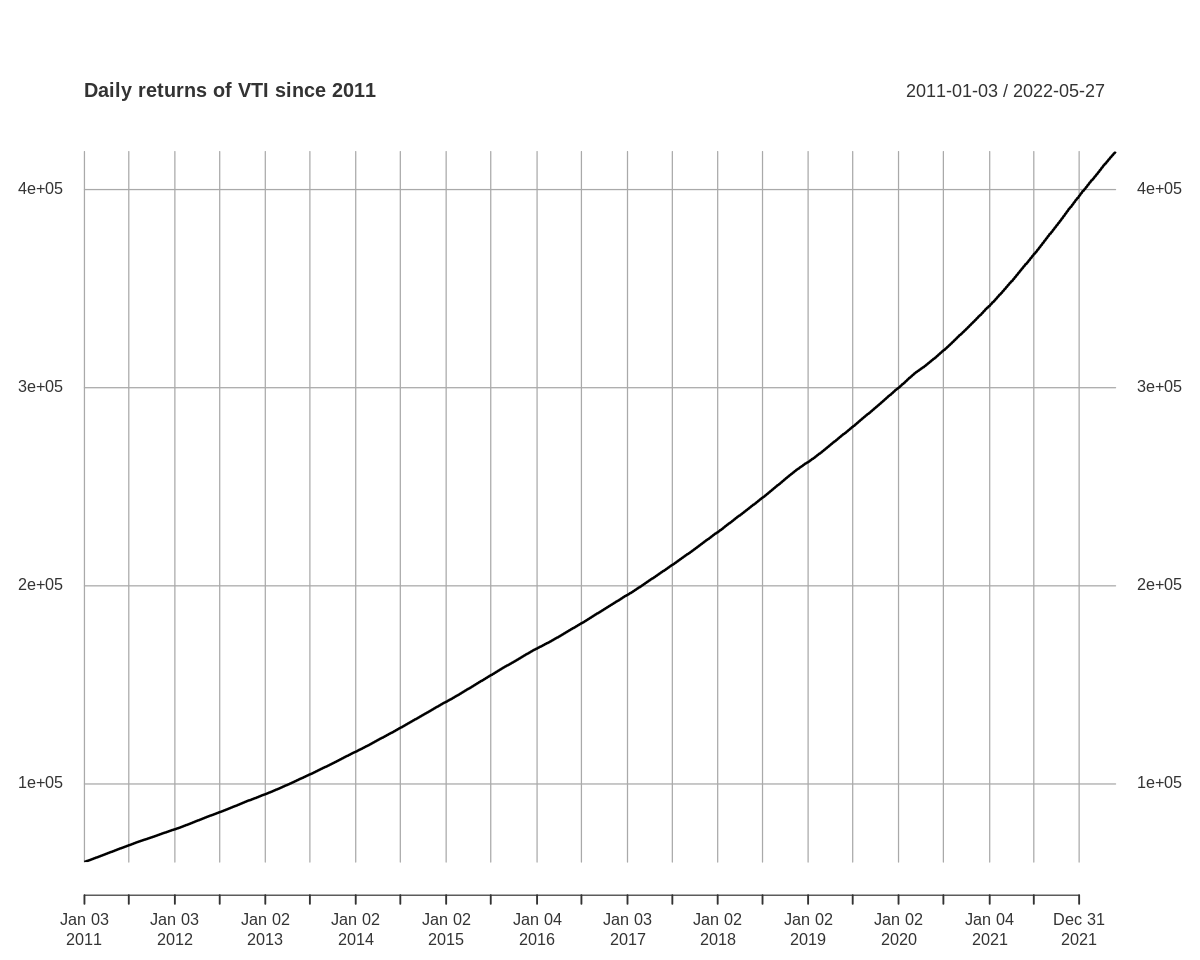

In [ ]:
plot(c["2011/2022"], main='Daily returns of VTI since 2011')